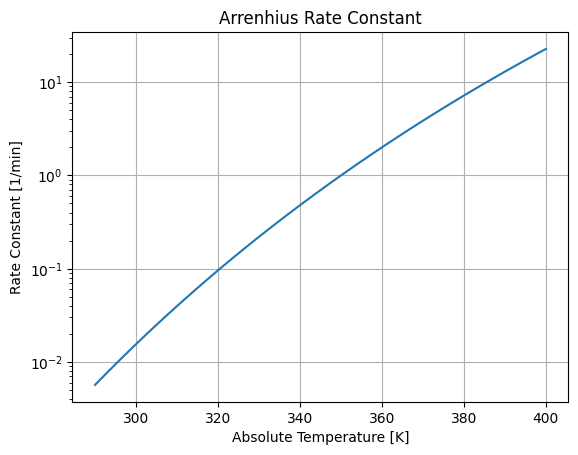

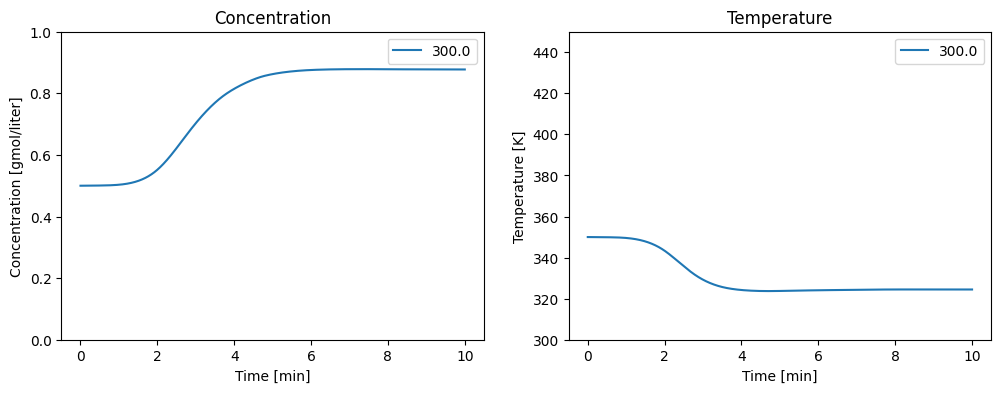

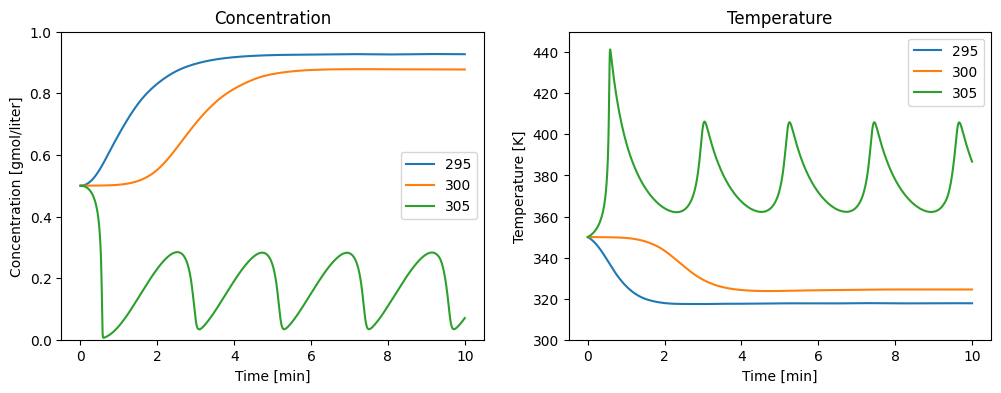

: 

In [4]:
# https://chat.openai.com/share/6f4f413f-fa09-496c-b3dd-44bab443d849

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Ea = 72750     # activation energy J/gmol
R = 8.314      # gas constant J/gmol/K
k0 = 7.2e10    # Arrhenius rate constant 1/min

def k(T):
    return k0*np.exp(-Ea/(R*T))

T = np.linspace(290,400)
plt.semilogy(T, k(T))
plt.xlabel('Absolute Temperature [K]')
plt.ylabel('Rate Constant [1/min]')
plt.title('Arrenhius Rate Constant')
plt.grid();

from scipy.integrate import solve_ivp

Ea  = 72750     # activation energy J/gmol
R   = 8.314     # gas constant J/gmol/K
k0  = 7.2e10    # Arrhenius rate constant 1/min
V   = 100.0     # Volume [L]
rho = 1000.0    # Density [g/L]
Cp  = 0.239     # Heat capacity [J/g/K]
dHr = -5.0e4    # Enthalpy of reaction [J/mol]
UA  = 5.0e4     # Heat transfer [J/min/K]
q   = 100.0     # Flowrate [L/min]
cAi = 1.0       # Inlet feed concentration [mol/L]
Ti  = 350.0     # Inlet feed temperature [K]
cA0 = 0.5;      # Initial concentration [mol/L]
T0  = 350.0;    # Initial temperature [K]
Tc  = 300.0     # Coolant temperature [K]

def deriv(t, y):
    cA,T = y
    dcAdt = (q/V)*(cAi - cA) - k(T)*cA
    dTdt = (q/V)*(Ti - T) + (-dHr/rho/Cp)*k(T)*cA + (UA/V/rho/Cp)*(Tc-T)
    return [dcAdt, dTdt]

IC = [cA0, T0]
t_initial = 0.0
t_final = 10.0
t = np.linspace(t_initial, t_final, 2000)
soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)

def plot_reactor(ax, t, y):
    ax[0].plot(t, y[0], label=str(Tc))
    ax[0].set_xlabel('Time [min]')
    ax[0].set_ylabel('Concentration [gmol/liter]')
    ax[0].set_title('Concentration')
    ax[0].set_ylim(0, 1)
    ax[0].legend()

    ax[1].plot(t, y[1], label=str(Tc))
    ax[1].set_xlabel('Time [min]')
    ax[1].set_ylabel('Temperature [K]');
    ax[1].set_title('Temperature')
    ax[1].set_ylim(300, 450)
    ax[1].legend()
    
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
plot_reactor(ax, soln.t, soln.y);

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
for Tc in [295, 300, 305]:
    soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)
    plot_reactor(ax, soln.t, soln.y)

from ipywidgets import interact
from IPython.display import display

Tc = 300.0
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)
plot_reactor(ax, soln.t, soln.y)
plt.close()

def sim(Tcooling):
    global Tc
    Tc = Tcooling
    soln = solve_ivp(deriv, [t_initial, t_final], IC, t_eval=t)
    ax[0].lines[0].set_ydata(soln.y[0])
    ax[0].legend().get_texts()[0].set_text(str(Tc))
    ax[1].lines[0].set_ydata(soln.y[1])
    ax[1].legend().get_texts()[0].set_text(str(Tc))
    display(fig)

interact(sim, Tcooling = (290.0, 310.0), continuous_update=False);


def plot_nullclines(ax):
    T = np.linspace(300.0,460.0,1000)
    ax.plot((q/V)*cAi/((q/V) + k(T)), T, 'b:')
    ax.plot(((q/V)*(Ti-T) + (UA/V/rho/Cp)*(Tc-T))/((dHr/rho/Cp)*k(T)), T, 'r:')
    ax.set_xlim(0,1)
    ax.set_ylim(300,460)
    ax.grid()
    ax.legend(['dC/dt = 0','dT/dt = 0'])
    ax.set_xlabel('Concentration')
    ax.set_ylabel('Temperature')
    
fix, ax = plt.subplots(1, 1, figsize=(8,6))
plot_nullclines(ax)

def plot_phase(ax, t, y):
    ax.plot(y[0][0], y[1][0], 'r.', ms=20)
    ax.plot(y[0], y[1], 'g', lw=2)

def phase(cinitial=0.5, Tinitial=350):
    global Tc
    soln = solve_ivp(deriv, [t_initial, t_final], [cinitial,Tinitial], t_eval=t)
    
    ax[0,0].lines[2].set_xdata(soln.y[0][0])
    ax[0,0].lines[2].set_ydata(soln.y[1][0])
    ax[0,0].lines[3].set_xdata(soln.y[0])
    ax[0,0].lines[3].set_ydata(soln.y[1])
    ax[1,0].lines[0].set_ydata(soln.y[0])
    ax[1,1].lines[0].set_ydata(soln.y[1])
    display(fig)
    
Tc = 300.0
cinitial = 0.5
Tinitial = 350.0
fig, ax = plt.subplots(2, 2, figsize=(12, 9))
soln = solve_ivp(deriv, [t_initial, t_final], [cinitial, Tinitial], t_eval=t)
plot_nullclines(ax[0,0])
plot_phase(ax[0,0], soln.t, soln.y)
plot_reactor(ax[1,:], soln.t, soln.y)
plt.close()

interact(phase, cinitial=(0,1,.01), Tinitial=(300,400,1))